<a href="https://colab.research.google.com/github/Sanjay05-coder/Cancer-Prediction-Gene-dataset-SVM/blob/main/Cancer_Prediction_(Gene_dataset_)_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library and read data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import svm
import pandas as pd


In [2]:
df=pd.read_csv('/content/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


Seperate X and y

In [4]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

Drawing scatter plot

/tmp/ipython-input-2729220422.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 3 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Cancer Present')


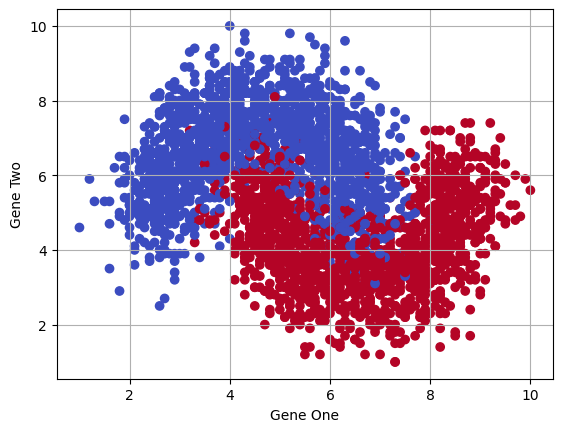

In [8]:
# drawing a scatter plot
plt.scatter(df['Gene One'], df['Gene Two'], c=df['Cancer Present'], cmap='coolwarm')
plt.xlabel('Gene One')
plt.ylabel('Gene Two')
plt.colorbar(scatter, label='Cancer Present')
plt.grid(True)
plt.show()


Spliting training and testing set

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scalling

In [10]:
##Standardization ensures all features contribute equally.
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Grid Search parameter tuning just to check

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# grid  search for parameter tuning (optional but highly recomended)
# if
param_grid={'C':[0.1,1,10,100], # to set decision boundry
            'gamma' : [1,0.1,0.01,0.001,'scale','auto'],
            'kernel':['linear','rbf']}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)# VERBOSE DISPLAYS THE PROGRESS OF GRID SEARCH
grid.fit(X_train,y_train)

print('\n Best Parameter')
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.858 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.865 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.858 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

## Model

In [16]:
svm_classifier=svm.SVC(kernel='rbf',C=0.1,gamma=1)
svm_classifier.fit(X_train_scaled,y_train)

SVC(C=0.1, gamma=1)

#Findng accuracy

In [17]:
best_classifier=grid.best_estimator_
y_pred_grid=best_classifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred_grid)
print("Accuracy:",accuracy*100)

Accuracy: 94.0


## GIVING DUMMY DATA SET TO PREDICT

In [18]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.2 MB/s eta 0:00:00


In [20]:
from faker import Faker
# this is used to generate some dummy data to test (synthetic data)
fake=Faker()

Gene_One=np.random.uniform(low=0.5,high=2.0,size=10)
Gene_Two=np.random.uniform(low=0.2,high=1.0,size=10)

In [21]:
dummy_df=pd.DataFrame({'Gene One':Gene_One,'Gene Two':Gene_Two})

In [22]:
dummy_df

,Gene One,Gene Two
0,0.808674,0.636895
1,1.794475,0.234147
2,0.867085,0.677716
3,0.743561,0.670865
4,1.874015,0.616949
5,0.932021,0.232164
6,1.831061,0.300860
7,1.940742,0.324222
8,0.970334,0.632899
9,0.822192,0.728209


In [24]:
prediction=best_classifier.predict(dummy_df[['Gene One','Gene Two']])

Binary label (1 = cancer, 0 = no cancer)

In [25]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Model Eval using Confusion matrix

In [27]:
conf_matrix=confusion_matrix(y_pred_grid,y_test)
print(conf_matrix)

[[313  21]
 [ 15 251]]


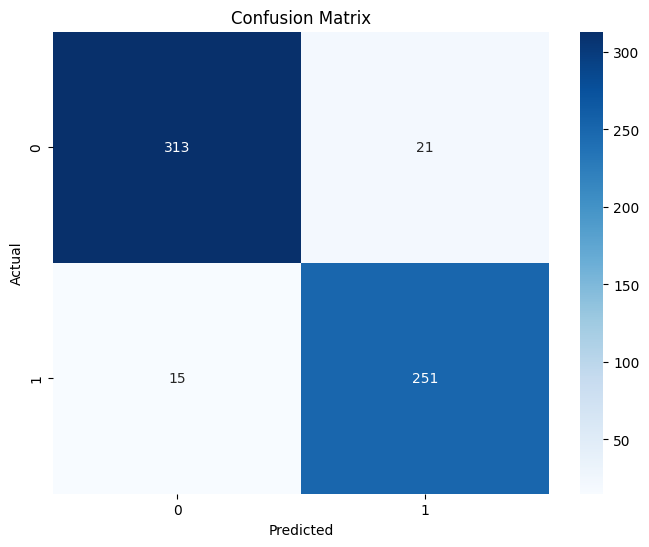

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

This project of predicting cancer was done by using the classification algo of Support Vector Machine aka SVM . This model gives an accuracy of 94.0% . with giving a dummy dataset using faker we were able to conclude that it has no cancer.I would say that this model is a good model.By doing the confusion matrix model eval method we can conclude that the model is doing very well, with high counts of correct predictions and relatively low errors.
The false negative rate is low, which is crucial in medical diagnostics.
Since the false positive rate is also reasonably low, meaning fewer unnecessary alarms.